In [1]:
import numpy as np
import pandas as pd
import os

project_path = os.path.abspath(os.getcwd())
project_path = project_path.rsplit('\\',1)[0]
data_path = project_path + "\\data\\"

In [2]:
os.chdir(data_path)
dfcat = pd.read_csv("2024-01-20_big_entropy_3AOIs.csv")
dfcat

,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy
0,big,58,H,0,0.630522,0.949065
1,big,58,H,10,0.370414,0.983242
2,big,58,H,20,0.286836,-0.000000
3,big,58,H,30,-0.000000,0.263429
4,big,58,H,40,0.638507,0.512912
...,...,...,...,...,...,...
22955,big,441,H,770,0.000000,0.000000
22956,big,441,H,780,-0.000000,-0.000000
22957,big,441,H,790,0.945639,0.363377
22958,big,441,H,800,0.524845,0.464406


In [3]:
dfcat['transition_entropy'] = dfcat['transition_entropy'].astype(str).replace('0.0',np.nan)
dfcat['stationary_entropy'] = dfcat['stationary_entropy'].astype(str).replace('0.0',np.nan)
print(len(dfcat))
dfcat = dfcat.dropna()
print(len(dfcat))
dfcat['transition_entropy'] = dfcat['transition_entropy'].replace('-0.0', '0.0').astype(float)
dfcat['stationary_entropy'] = dfcat['stationary_entropy'].replace('-0.0', '0.0').astype(float)
dfbig = dfcat[dfcat['Start']<820]

22960
18733


C:\Users\HIBVR\AppData\Local\Temp\ipykernel_26840\2043223299.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['transition_entropy'] = dfcat['transition_entropy'].replace('-0.0', '0.0').astype(float)
C:\Users\HIBVR\AppData\Local\Temp\ipykernel_26840\2043223299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['stationary_entropy'] = dfcat['stationary_entropy'].replace('-0.0', '0.0').astype(float)


In [4]:
print(dfbig['transition_entropy'].value_counts())
print(dfbig['stationary_entropy'].value_counts())

transition_entropy
0.000000    8695
0.636514      62
0.693147      56
0.562335      20
0.450561      17
            ... 
0.548270       1
0.064948       1
0.434068       1
0.062722       1
0.375746       1
Name: count, Length: 9640, dtype: int64
stationary_entropy
0.000000    2427
0.693147       9
0.693147       2
0.611244       2
0.692461       2
            ... 
0.333060       1
0.671810       1
0.561863       1
0.317468       1
0.689600       1
Name: count, Length: 16083, dtype: int64


In [5]:
os.chdir(data_path + "\\questionnaire\\")
dfs = pd.read_csv('big_szenarios.csv', sep=";", decimal=',')
dfs.columns = ['Start', 'End','event','name']
dfs['event_agg'] = np.where(dfs['event'].isin(['teacher explanation', 'teacher explanation + nodding', 'reading + teacher explanation', 'teacher explanation + question']), 0, 1)
dfs = dfs.rename(columns={'Start':'Start_float'})
dfs['Start'] = ((dfs['Start_float'] /10).round(0))*10
df = dfbig.merge(dfs[['Start', 'event_agg']], on='Start', how='left').reset_index()
len(df)
dfs.to_csv('big_szenarios_int_time.csv',index=False)

In [6]:
dff = df.dropna(subset='event_agg', ignore_index=True)
len(dff)
dff

,index,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy,event_agg
0,5,big,58,H,50,0.874791,0.898893,1.0
1,6,big,58,H,60,0.746725,0.692681,1.0
2,7,big,58,H,70,0.673012,0.917456,1.0
3,8,big,58,H,80,0.760815,0.868792,1.0
4,9,big,58,H,90,0.537800,0.734356,1.0
...,...,...,...,...,...,...,...,...
16718,18728,big,441,H,730,0.000000,0.000000,1.0
16719,18729,big,441,H,780,0.000000,0.000000,0.0
16720,18730,big,441,H,790,0.945639,0.363377,0.0
16721,18731,big,441,H,800,0.524845,0.464406,0.0


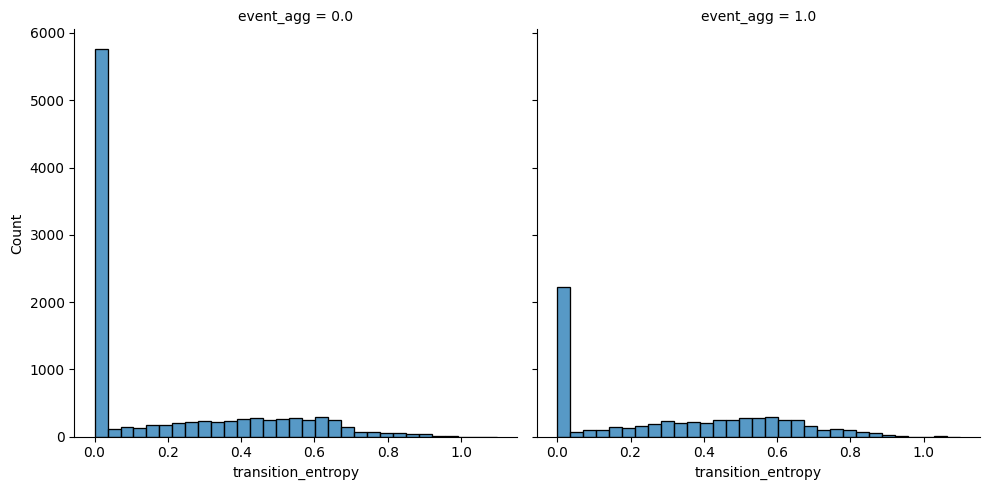

In [7]:
import seaborn as sns
sns.displot(data=dff, x='transition_entropy', col='event_agg')

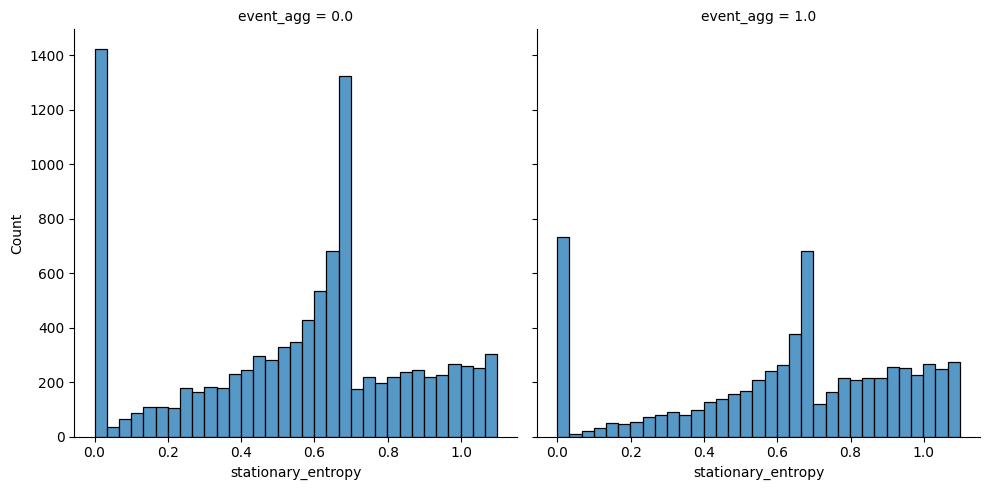

In [8]:
sns.displot(data=dff, x='stationary_entropy', col='event_agg')

In [9]:
print('Transition Entropy')
dff.groupby('event_agg')['transition_entropy'].describe()

Transition Entropy


,count,mean,std,min,25%,50%,75%,max
event_agg,,,,,,,,
0.0,10150.0,0.187699,0.253211,0.0,0.0,0.000000,0.393653,1.098612
1.0,6376.0,0.301586,0.273042,0.0,0.0,0.298826,0.538544,1.049876


In [10]:
print('Stationary Entropy')
dff.groupby('event_agg')['stationary_entropy'].describe()

Stationary Entropy


,count,mean,std,min,25%,50%,75%,max
event_agg,,,,,,,,
0.0,10150.0,0.552395,0.316296,0.0,0.348544,0.617664,0.750327,1.098330
1.0,6376.0,0.628959,0.319434,0.0,0.459065,0.675818,0.886856,1.098324


In [11]:
dff['Condition_hand'] = np.where(dff['Condition'].isin(['A', 'E', 'I','M']), 20, 
                            np.where(dff['Condition'].isin(['B', 'F', 'J', 'N']), 35,
                                     np.where(dff['Condition'].isin(['C', 'G', 'K', 'O']), 65, 80)))
dff['Condition_hand'].value_counts()                                  

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_26840\1471764755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Condition_hand'] = np.where(dff['Condition'].isin(['A', 'E', 'I','M']), 20,


Condition_hand
80    4798
20    4428
35    3843
65    3654
Name: count, dtype: int64

In [12]:
dff['NA'] = dff['transition_entropy'].isnull()
x = dff.groupby('ID')['NA'].sum().sort_values(ascending=False)
x.head(20)
xd = x[x<=14] #drop ases with more tan 20% missings
id_lst = xd.index.to_list()

dfd = dff[dff['ID'].isin(id_lst)]
len(dfd)
dfd = dfd.drop(columns=['NA'])
dfd['Condition_hand'].value_counts() 

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_26840\640795168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['NA'] = dff['transition_entropy'].isnull()


Condition_hand
80    4798
20    4428
35    3843
65    3654
Name: count, dtype: int64

In [13]:
len(dfd['Start'].unique())

74

In [14]:
dfg = dfd[['ID','transition_entropy', 'stationary_entropy']].groupby('ID').mean().reset_index()
dfg.columns = ['ID', 'trans_mean', 'stat_mean']
dfm = dfd.merge(dfg, on='ID', how='left')
dfm['transition_entropy_c'] = dfm['transition_entropy']-dfm['trans_mean']
dfm['stationary_entropy_c'] = dfm['stationary_entropy']-dfm['stat_mean']
dfm

,index,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy,event_agg,Condition_hand,trans_mean,stat_mean,transition_entropy_c,stationary_entropy_c
0,5,big,58,H,50,0.874791,0.898893,1.0,80,0.423162,0.563775,0.451628,0.335118
1,6,big,58,H,60,0.746725,0.692681,1.0,80,0.423162,0.563775,0.323563,0.128906
2,7,big,58,H,70,0.673012,0.917456,1.0,80,0.423162,0.563775,0.249849,0.353681
3,8,big,58,H,80,0.760815,0.868792,1.0,80,0.423162,0.563775,0.337653,0.305017
4,9,big,58,H,90,0.537800,0.734356,1.0,80,0.423162,0.563775,0.114637,0.170580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16718,18728,big,441,H,730,0.000000,0.000000,1.0,80,0.111450,0.180286,-0.111450,-0.180286
16719,18729,big,441,H,780,0.000000,0.000000,0.0,80,0.111450,0.180286,-0.111450,-0.180286
16720,18730,big,441,H,790,0.945639,0.363377,0.0,80,0.111450,0.180286,0.834189,0.183091
16721,18731,big,441,H,800,0.524845,0.464406,0.0,80,0.111450,0.180286,0.413395,0.284120


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_variables(df, var):
    sns.set_theme(style="darkgrid")
    sns.set(rc={'figure.figsize':(12,6)})
    sns.set_theme(style="darkgrid")
    y = df[var]
    plt.title(var)

    ax = sns.lineplot(x="Start", y=y,
             data=df, markers="o")
    ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


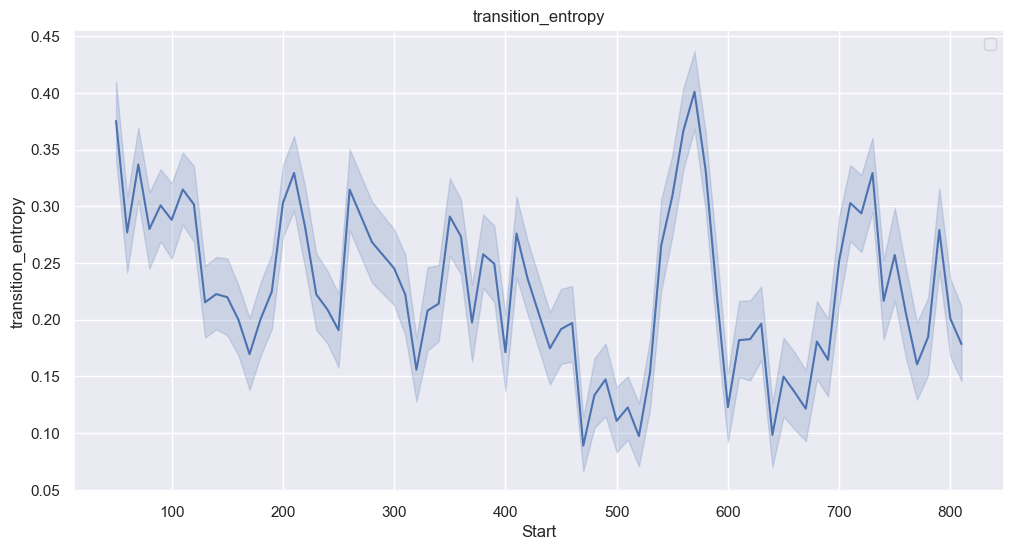

In [16]:
plot_variables(dfm, 'transition_entropy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


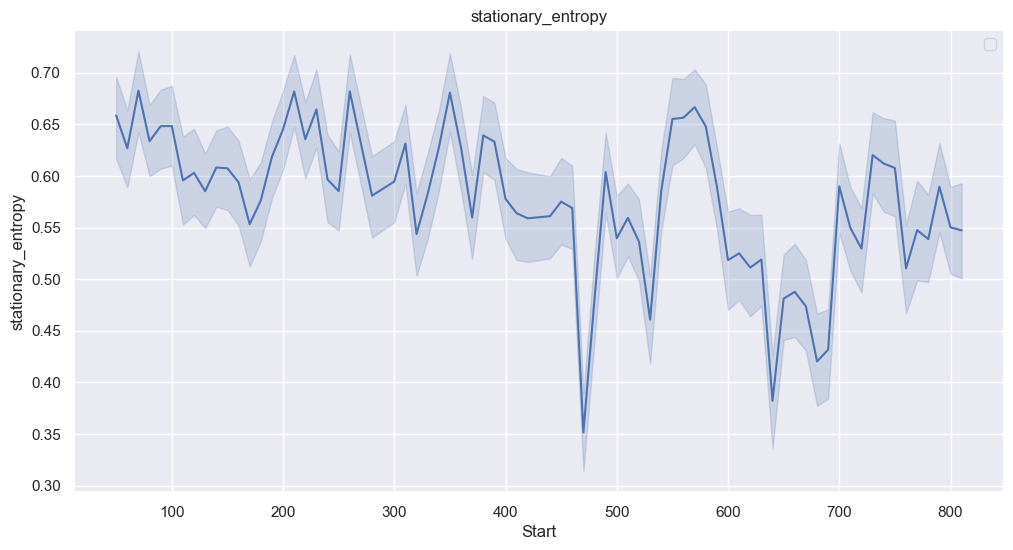

In [17]:
plot_variables(dfm, 'stationary_entropy')

In [18]:
def plot_variables_cond(df, var):
    sns.set_theme(style="darkgrid")
    sns.set(rc={'figure.figsize':(12,6)})
    sns.set_theme(style="darkgrid")
    y = df[var]
    plt.title(var)

    ax = sns.lineplot(x="Start", y=y, hue="Condition_hand",
             data=df,style='Condition_hand', markers=["o", "o"])
    
    ax.legend()

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_26840\682263831.py:8: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(x="Start", y=y, hue="Condition_hand",


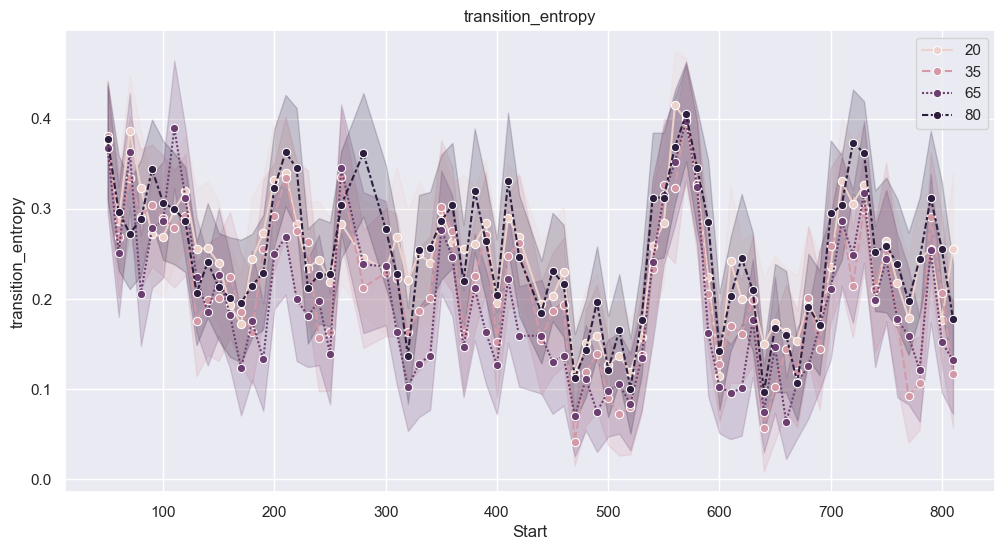

In [19]:
plot_variables_cond(dfm, 'transition_entropy')

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_26840\682263831.py:8: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(x="Start", y=y, hue="Condition_hand",


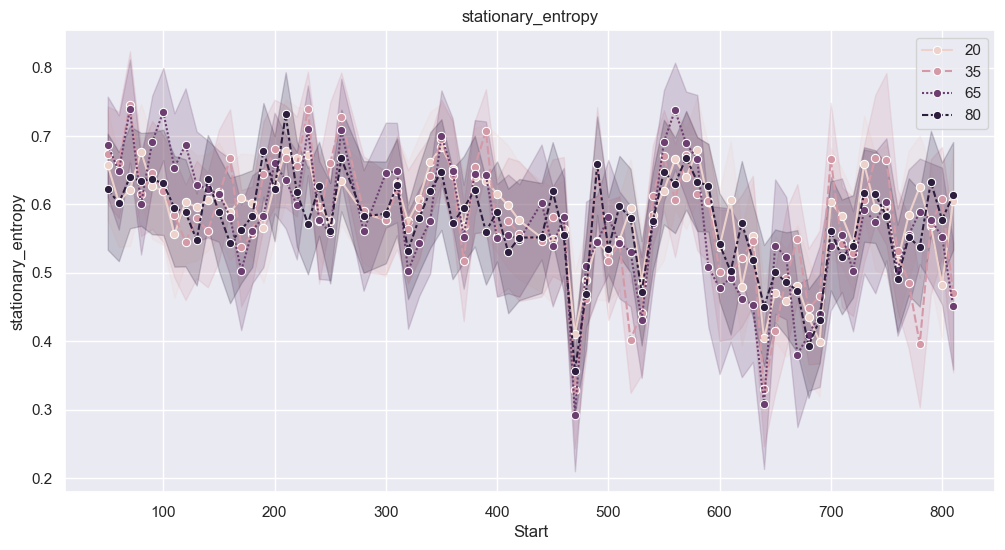

In [20]:
plot_variables_cond(dfm, 'stationary_entropy')

In [21]:
os.chdir(data_path + "\\big_hand_raising\\")
dfm.to_csv("2024-01-20_big_entropy_events_with_zero_3AOIS_10sec.csv", index=False)

## Predcition Task

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [23]:
dfm['Start_int'] = (dfm['Start']-50)/10
print(len(dfm))

16723


In [30]:
df = dfm.dropna()
y = df['event_agg'].replace(0,-1)
X = df[['transition_entropy_c','stationary_entropy_c']]

In [31]:
y_pred_lst = list()
f1_lst = list()
conf = np.zeros([2,2])
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_lst.append(y_pred)
    f1_lst.append(f1_score(y_test, y_pred, average='weighted'))
    conf += confusion_matrix(y_test, y_pred)

In [32]:
np.round(conf/(conf.sum()),2)

array([[0.52, 0.09],
       [0.27, 0.12]])

In [33]:
np.mean(f1_lst)

0.6091438724345714

In [28]:
dfe = pd.DataFrame()

for id in dfm['ID'].unique():
    dfsub = dfm[dfm['ID']==id]
    
    event_lst = list()
    for i in range(len(dfsub)-3):
        event = dfsub['event_agg'].iloc[i:i+3].sum()
        event_lst.append(event)
    dfsub = dfsub.iloc[:-3,:]
    dfsub['event_int'] = event_lst
    dfe = pd.concat([dfe, dfsub], axis=0)

In [29]:
dfe['event_new'] = np.where(dfe['event_int'].isin([3,2,1]), 1,0)
dfe

,index,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy,event_agg,Condition_hand,trans_mean,stat_mean,transition_entropy_c,stationary_entropy_c,Start_int,event_int,event_new
0,5,big,58,H,50,0.874791,0.898893,1.0,80,0.423162,0.563775,0.451628,0.335118,0.0,3.0,1
1,6,big,58,H,60,0.746725,0.692681,1.0,80,0.423162,0.563775,0.323563,0.128906,1.0,3.0,1
2,7,big,58,H,70,0.673012,0.917456,1.0,80,0.423162,0.563775,0.249849,0.353681,2.0,3.0,1
3,8,big,58,H,80,0.760815,0.868792,1.0,80,0.423162,0.563775,0.337653,0.305017,3.0,3.0,1
4,9,big,58,H,90,0.537800,0.734356,1.0,80,0.423162,0.563775,0.114637,0.170580,4.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16715,18725,big,441,H,700,0.000000,0.000000,0.0,80,0.111450,0.180286,-0.111450,-0.180286,65.0,2.0,1
16716,18726,big,441,H,710,0.000000,0.000000,1.0,80,0.111450,0.180286,-0.111450,-0.180286,66.0,3.0,1
16717,18727,big,441,H,720,0.000000,0.000000,1.0,80,0.111450,0.180286,-0.111450,-0.180286,67.0,2.0,1
16718,18728,big,441,H,730,0.000000,0.000000,1.0,80,0.111450,0.180286,-0.111450,-0.180286,68.0,1.0,1


In [351]:
df = dfe.dropna()
y = df['event_new'].replace(0,-1)
X = df[['transition_entropy_c','stationary_entropy_c']]

In [352]:
y_pred_lst = list()
f1_lst = list()
conf = np.zeros([2,2])
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_lst.append(y_pred)
    f1_lst.append(f1_score(y_test, y_pred, average='weighted'))
    conf += confusion_matrix(y_test, y_pred)

In [353]:
np.round(conf/(conf.sum()),2)

array([[0.26, 0.19],
       [0.13, 0.42]])

In [354]:
conf/50

array([[ 928.82,  676.18],
       [ 482.64, 1496.36]])

In [355]:
np.mean(f1_lst)

0.6738111829655952

In [356]:
df['event_new'].value_counts()

event_new
1    9895
0    8025
Name: count, dtype: int64

--- End